<a href="https://colab.research.google.com/github/Ashakorakooti/Asha/blob/main/sales_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("bhanupratapbiswas/superstore-sales")

print("Path to dataset files:", path)

100%|██████████| 478k/478k [00:00<00:00, 873kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/bhanupratapbiswas/superstore-sales/versions/1


In [2]:
import os

# List all files in the dataset path
for root, dirs, files in os.walk(path):
    for file in files:
        print(os.path.join(root, file))


/root/.cache/kagglehub/datasets/bhanupratapbiswas/superstore-sales/versions/1/superstore_final_dataset (1).csv


In [5]:
import pandas as pd

# Correct encoding fix
file_path = "/root/.cache/kagglehub/datasets/bhanupratapbiswas/superstore-sales/versions/1/superstore_final_dataset (1).csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Preview
df.head()


,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


In [6]:
# Dataset info
df.info()

# Check missing values
print("\n🔹 Missing Values:")
print(df.isnull().sum())

# Drop duplicates
df.drop_duplicates(inplace=True)

# Convert date column (if present)
if 'Order Date' in df.columns:
    df['Order Date'] = pd.to_datetime(df['Order Date'])

# Fix column names (remove leading/trailing spaces)
df.columns = df.columns.str.strip()

# Fill missing numeric/categorical values if any
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].mean(), inplace=True)

# Final check
print("\n✅ Cleaned Dataset Summary:")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub_Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

/tmp/ipython-input-6-90955739.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# 1. 📌 Summary statistics for numeric columns
print("🔹 Summary Statistics:")
display(df.describe())

🔹 Summary Statistics:


,Row_ID,Postal_Code,Sales
count,9800.000000,9800.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32023.234209,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,57551.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [10]:
# 2. 🔹 Value counts for categorical columns
categorical_cols = df.select_dtypes(include='object').columns

print("\n🔹 Value counts (top categories):")
for col in categorical_cols:
    print(f"{col} → {df[col].nunique()} unique values")
    print(df[col].value_counts().head(), "\n")


🔹 Value counts (top categories):
Order_ID → 4922 unique values
Order_ID
CA-2018-100111    14
CA-2018-157987    12
US-2017-108504    11
CA-2017-165330    11
US-2016-126977    10
Name: count, dtype: int64 

Order_Date → 1230 unique values
Order_Date
5/9/2017      38
10/11/2017    35
1/12/2018     34
2/12/2018     34
9/12/2018     33
Name: count, dtype: int64 

Ship_Date → 1326 unique values
Ship_Date
26/09/2018    34
6/12/2018     32
16/12/2016    31
15/09/2018    30
12/12/2018    30
Name: count, dtype: int64 

Ship_Mode → 4 unique values
Ship_Mode
Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: count, dtype: int64 

Customer_ID → 793 unique values
Customer_ID
WB-21850    35
MA-17560    34
PP-18955    34
JL-15835    33
JD-15895    32
Name: count, dtype: int64 

Customer_Name → 793 unique values
Customer_Name
William Brown       35
Matt Abelman        34
Paul Prost          34
John Lee            33
Jonathan Doherty    32
Name: count, dty

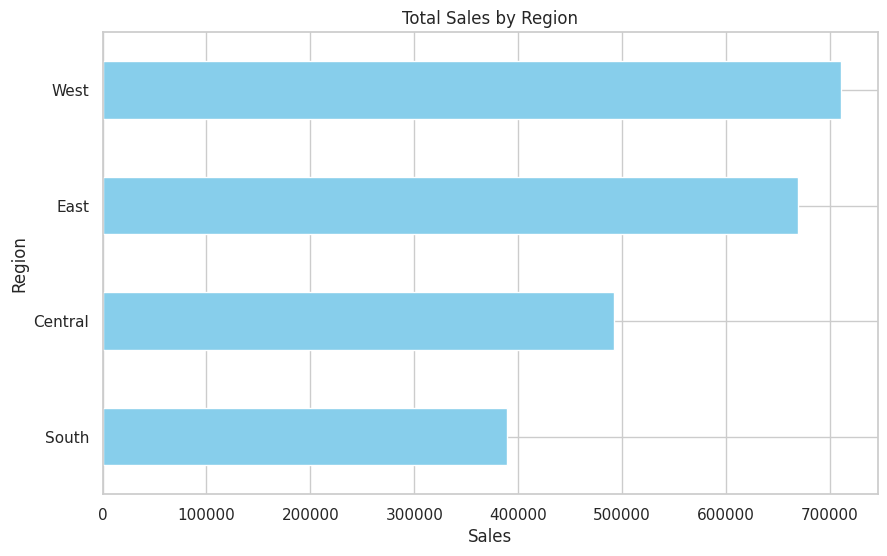

In [11]:
# 3. 📈 Total Sales by Region
if 'Region' in df.columns and 'Sales' in df.columns:
    df.groupby('Region')['Sales'].sum().sort_values().plot(kind='barh', color='skyblue')
    plt.title("Total Sales by Region")
    plt.xlabel("Sales")
    plt.ylabel("Region")
    plt.show()

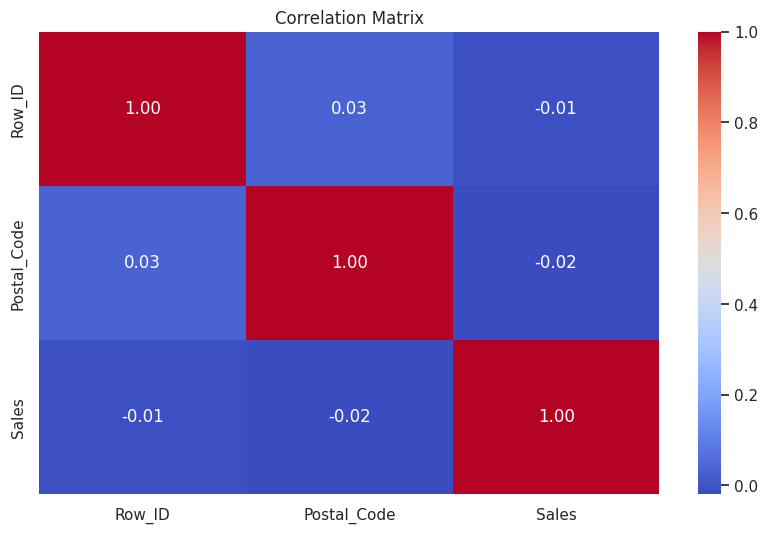

In [38]:
# 6. 📅 Sales Trend Over Time
if 'Order Date' in df.columns:
    df.set_index('Order Date').resample('M')['Sales'].sum().plot()
    plt.title("Monthly Sales Trend")
    plt.ylabel("Sales")
    plt.xlabel("Month")
    plt.show()

# 7. 🔍 Correlation Matrix (for numeric features)
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [24]:
print(df.columns.tolist())
df.columns = df.columns.str.strip()

df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')
print(df['Order_Date'].dtypes)


['Order_Date', 'Row_ID', 'Order_ID', 'Ship_Date', 'Ship_Mode', 'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State', 'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category', 'Product_Name', 'Sales']
datetime64[ns]


/tmp/ipython-input-24-1968850897.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')


/tmp/ipython-input-23-2272379011.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sales_trend = df.groupby([pd.Grouper(freq='M'), 'Category'])['Sales'].sum().unstack()
/tmp/ipython-input-23-2272379011.py:23: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


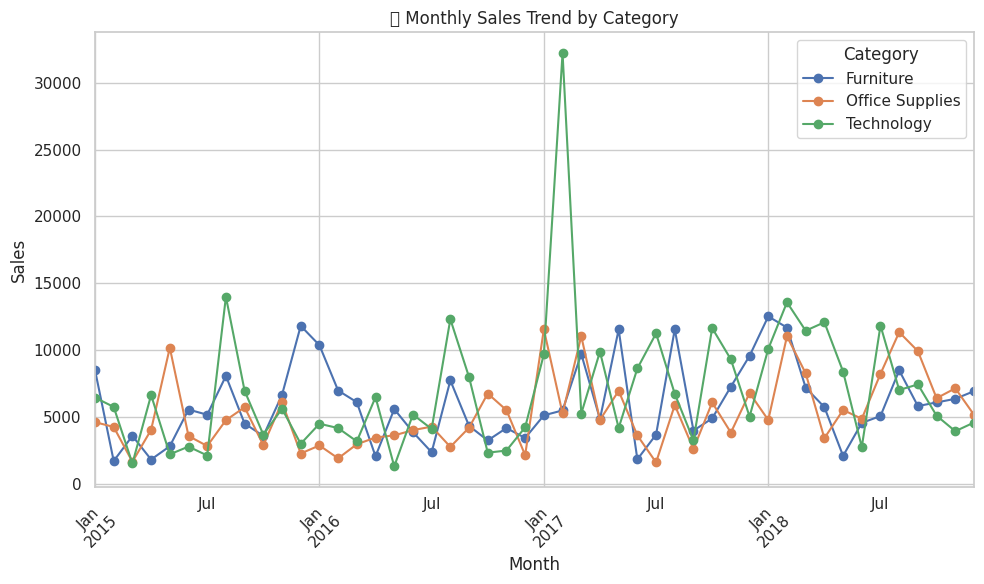

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure datetime format
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')

# Drop rows where date conversion failed
df = df.dropna(subset=['Order_Date'])

# Set date as index
df.set_index('Order_Date', inplace=True)

# Group sales by Month and Category
sales_trend = df.groupby([pd.Grouper(freq='M'), 'Category'])['Sales'].sum().unstack()

# Plot
sales_trend.plot(marker='o')
plt.title("📅 Monthly Sales Trend by Category")
plt.ylabel("Sales")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.legend(title="Category")
plt.tight_layout()
plt.show()

# Reset index for further analysis
df.reset_index(inplace=True)


/tmp/ipython-input-25-2987563770.py:8: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


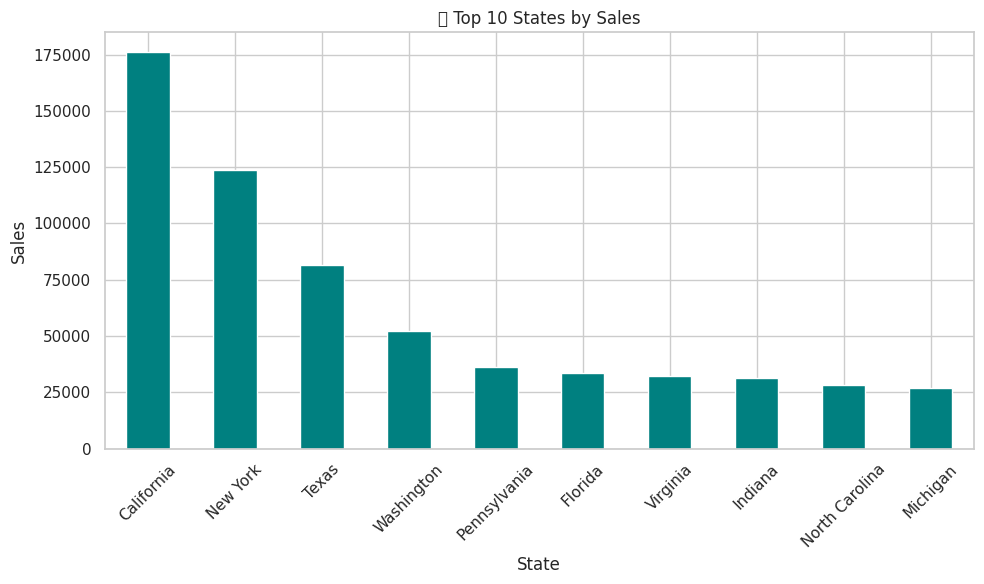

In [25]:
# 2. 🏙️ Total Sales by State (Top 10)
if 'State' in df.columns:
    df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10).plot(kind='bar', color='teal')
    plt.title("🏆 Top 10 States by Sales")
    plt.ylabel("Sales")
    plt.xlabel("State")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

/tmp/ipython-input-27-1644778843.py:10: UserWarning: Glyph 128666 (\N{DELIVERY TRUCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128666 (\N{DELIVERY TRUCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


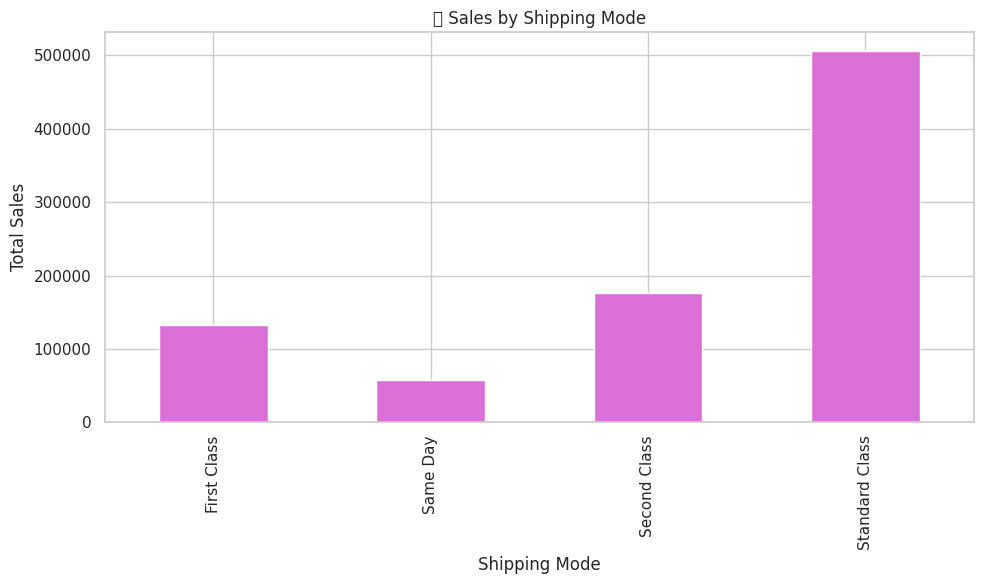

In [27]:
# Strip column names to be safe
df.columns = df.columns.str.strip()

# Group and plot sales by Ship_Mode
if 'Ship_Mode' in df.columns:
    df.groupby('Ship_Mode')['Sales'].sum().plot(kind='bar', color='orchid')
    plt.title("🚚 Sales by Shipping Mode")
    plt.ylabel("Total Sales")
    plt.xlabel("Shipping Mode")
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Column 'Ship_Mode' not found.")


/tmp/ipython-input-28-3778524557.py:7: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


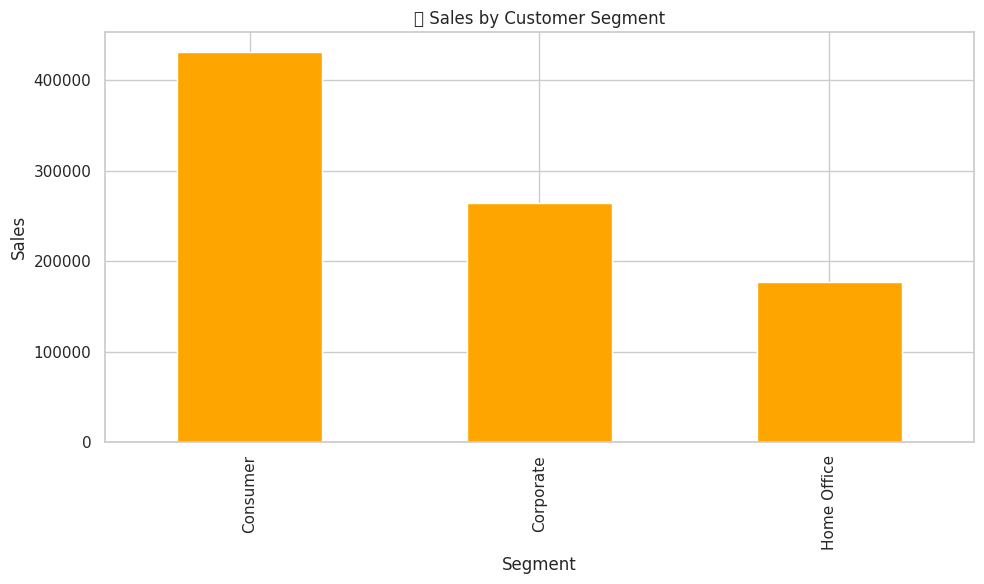

In [28]:
# 4. 👥 Sales by Segment
if 'Segment' in df.columns:
    df.groupby('Segment')['Sales'].sum().plot(kind='bar', color='orange')
    plt.title("👥 Sales by Customer Segment")
    plt.ylabel("Sales")
    plt.xlabel("Segment")
    plt.tight_layout()
    plt.show()

In [31]:
print(df.columns.tolist())


['Order_Date', 'Row_ID', 'Order_ID', 'Ship_Date', 'Ship_Mode', 'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State', 'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category', 'Product_Name', 'Sales']


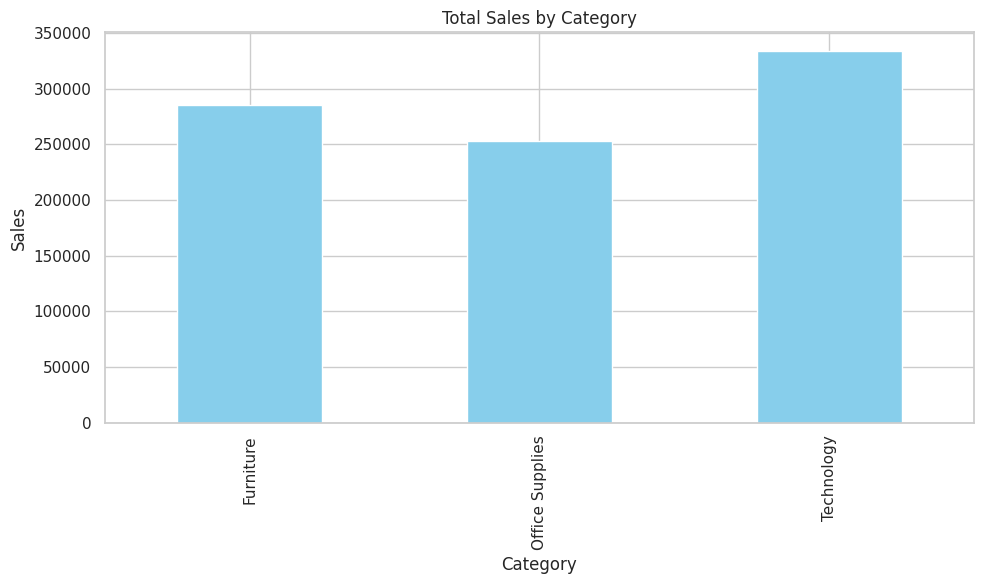

In [32]:
df.groupby('Category')['Sales'].sum().plot(kind='bar', color='skyblue')
plt.title("Total Sales by Category")
plt.ylabel("Sales")
plt.xlabel("Category")
plt.tight_layout()
plt.show()


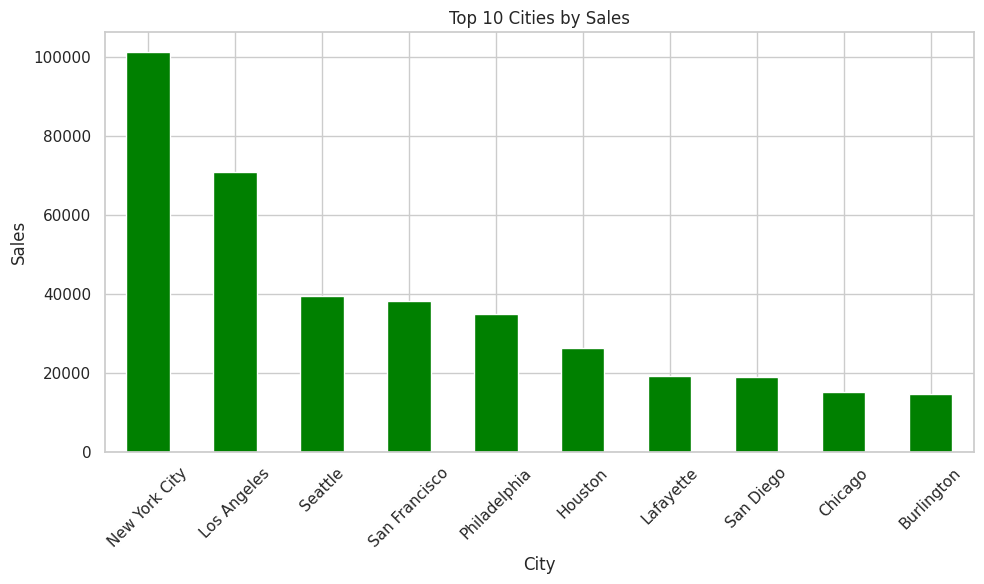

In [33]:
df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10).plot(kind='bar', color='green')
plt.title("Top 10 Cities by Sales")
plt.ylabel("Sales")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-34-1865694133.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order_Date'] = pd.to_datetime(df['Order_Date'])
/tmp/ipython-input-34-1865694133.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M')['Sales'].sum().plot(marker='o', color='coral')


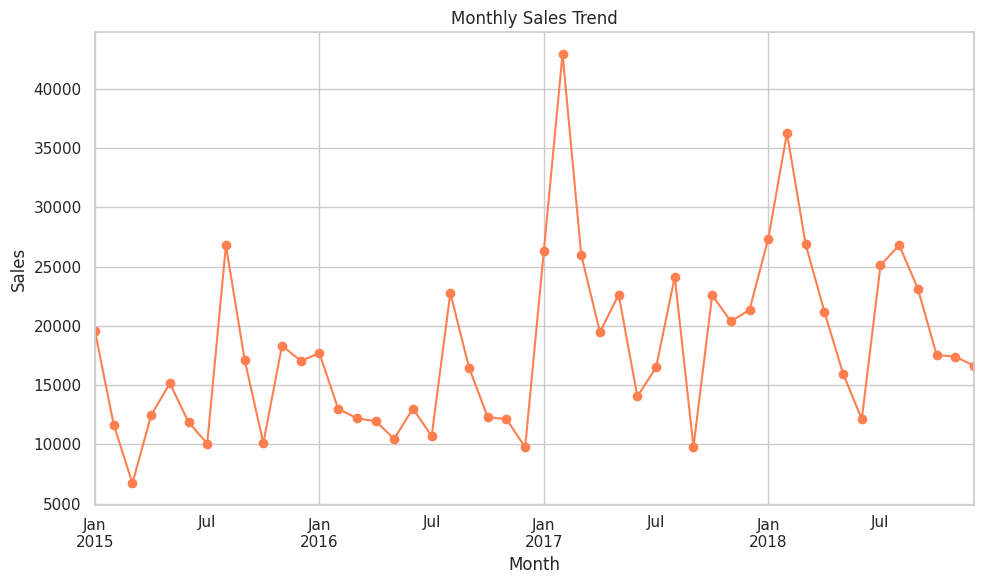

In [34]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df.set_index('Order_Date', inplace=True)

df.resample('M')['Sales'].sum().plot(marker='o', color='coral')
plt.title("Monthly Sales Trend")
plt.ylabel("Sales")
plt.xlabel("Month")
plt.tight_layout()
plt.show()

df.reset_index(inplace=True)


In [39]:
total_sales = df['Sales'].sum()
avg_order_value = df['Sales'].mean()
total_orders = df['Order_ID'].nunique()

print(f"🧾 Total Sales: ₹{total_sales:,.2f}")
print(f"📦 Average Order Value: ₹{avg_order_value:,.2f}")
print(f"🛒 Total Unique Orders: {total_orders}")


🧾 Total Sales: ₹872,363.12
📦 Average Order Value: ₹220.35
🛒 Total Unique Orders: 1975


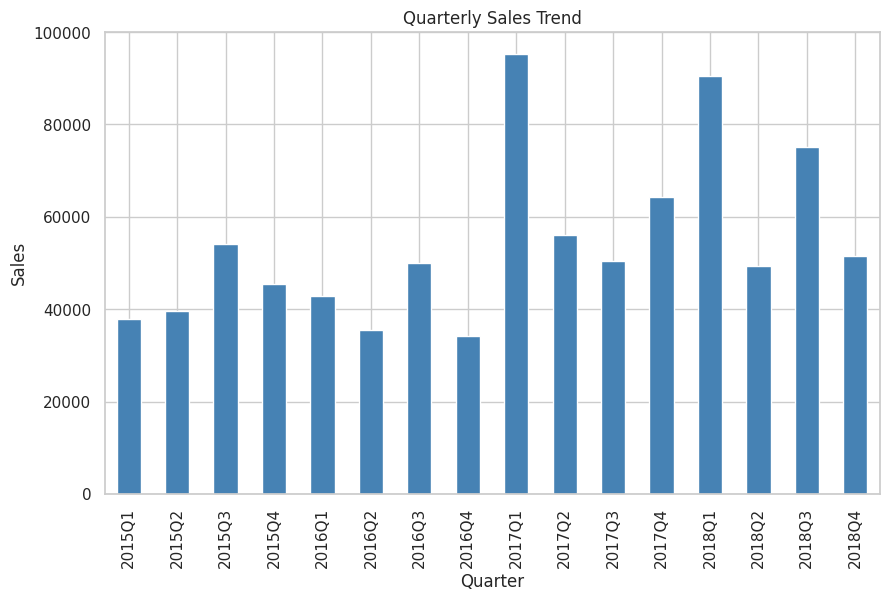

In [40]:
df['Quarter'] = df['Order_Date'].dt.to_period('Q')
df.groupby('Quarter')['Sales'].sum().plot(kind='bar', color='steelblue')
plt.title("Quarterly Sales Trend")
plt.ylabel("Sales")
plt.show()
